<a href="https://colab.research.google.com/github/sakib927/Intresting_Programs/blob/main/Bitcoin_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import threading 
import os 
from datetime import datetime
import pytz
import json
import requests
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
def get_curr_time():
  hour_time = datetime.now(pytz.timezone("Asia/Kolkata")).strftime("%H")
  min_time = datetime.now(pytz.timezone("Asia/Kolkata")).strftime("%M")
  sec_time = datetime.now(pytz.timezone("Asia/Kolkata")).strftime("%S")
  l1  = hour_time,min_time,sec_time
  return l1

In [3]:
data = pd.DataFrame()
data[['Hour_Time','Min_Time','Sec_Time','BTC_Value']] = (0,0,0,0)

In [4]:
def get_btc_val():
  a = 0
  currency="INR"
  url=("https://min-api.cryptocompare.com/data/price?fsym=BTC&tsyms={}".format(currency.upper()))
  response=requests.request("GET",url)
  response=json.loads(response.text)
  a = (response.values())
  a = list(a)
  return a[0] 

In [5]:
def get_data_to_dataset():
  global data
  alpha  = {'Hour_Time':get_curr_time()[0],'Min_Time':get_curr_time()[1],'Sec_Time':get_curr_time()[2],'BTC_Value':get_btc_val()}
  data=data.append(alpha,ignore_index=True)  

In [6]:
def update_data():
  global data
  alpha  = {'Hour_Time':get_curr_time()[0],'Min_Time':get_curr_time()[1],'Sec_Time':get_curr_time()[2],'BTC_Value':get_btc_val()}
  data=data.append(alpha,ignore_index=True)  

In [7]:
def get_graph():

    sns.lineplot(x = data['Min_Time'].tail(150),y = data['BTC_Value'].tail(150))
    plt.show() #ploting graph of last 15 min

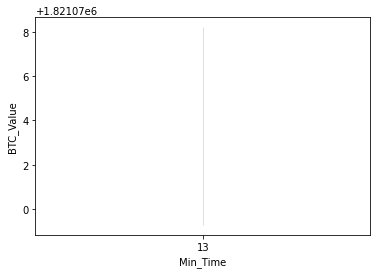

KeyboardInterrupt: ignored

In [8]:
while True:
  os.system('cls')
  for i in range(10):
    update_data()
  get_graph()
  time.sleep(60)